# Accesssing EMODnet Physics data (ERDDAP)
#### Written by Pascal Derycke (Marine Analyst) and Laurent Dubroca (Ifremer)

In [1]:
# This is a test for mybinder.com
# if you envoy dirty code then it is for you :-)
# Install R packages
install.packages('ggplot2')
install.packages('ggmap')
install.packages('ggrepel')
install.packages('raster')
install.packages('rasterVis')
install.packages('mapdata')
install.packages('sp')
install.packages('downloader')
install.packages('rgdal')
install.packages('XML')
install.packages("rgeos")
install.packages("knitr")
install.packages("kableExtra")

Installing package into ‘/home/jupyter-webmaster/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter-webmaster/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter-webmaster/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter-webmaster/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter-webmaster/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter-webmaster/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter-webmaster/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter-webmaster/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter-webmaster/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

W

Now that they are installed, we need to load them into memory:

In [2]:
# load dependencies
## geospatial data handling
library(rgdal)
library(raster)
library(sp)
library(mapdata)
library(rgeos)
## general data handling
library(XML)
library(downloader)
## plotting
library(rasterVis)
library(ggplot2)
## for display reasons
library(knitr)
library(kableExtra)
library(ggmap)
library(ggrepel)


Loading required package: sp

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-5

Loading required package: maps

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.6.2-CAPI-1.10.2
and GEOS at installation 3.7.2dev-CAPI-1.11.2differ”
rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.6.2-CAPI-1.10.2 
 Linking to sp version: 1.4-5 
 Polygon checking: TRUE 


Loading required package: lattice

Loading required package: latticeExtra

Loading required package: RColorBrewer


Attaching package: ‘ggplot2’


The following object is masked from ‘package:latticeExtra’:

    layer


Google's Terms of Service: https://cloud.g

# Setting the session parameters



Define the geographical extent for accessing data

In [3]:
Sessionid <- 'mySession'
source_provider <- "EMODnet Physics"
source_provider_url <- "https://www.emodnet.eu"
layer_title<-"Platforms collecting SLEV"
layer <- "EP_PLATFORMS_SLEV"
wfs_url <- "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?"
wms_url <- "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wms?"
wms_layer <- "EP_PLATFORMS_SLEV"
geometry_name<-"position"
map_label<-"PlatformID"
epsg_code<-"EPSG:4326"


minlon <- -2.02
minlat <- 43.18
maxlon <- -1.17
maxlat <- 44.09

xmin <- as.numeric(minlon)
ymin <- as.numeric(minlat)
xmax <- as.numeric(maxlon)
ymax <- as.numeric(maxlat)

print (paste("West-Longitude:",round(xmin,2)))
print (paste("South-Latitude:",round(ymin,2)))
print (paste("East-Longitude:",round(xmax,2)))
print (paste("North-Latitude:",round(ymax,2)))

[1] "West-Longitude: -2.02"
[1] "South-Latitude: 43.18"
[1] "East-Longitude: -1.17"
[1] "North-Latitude: 44.09"


We make some maps to show the location of the MPA.

Source : http://tile.stamen.com/terrain/6/31/22.png

Source : http://tile.stamen.com/terrain/6/31/23.png

Regions defined for each Polygons



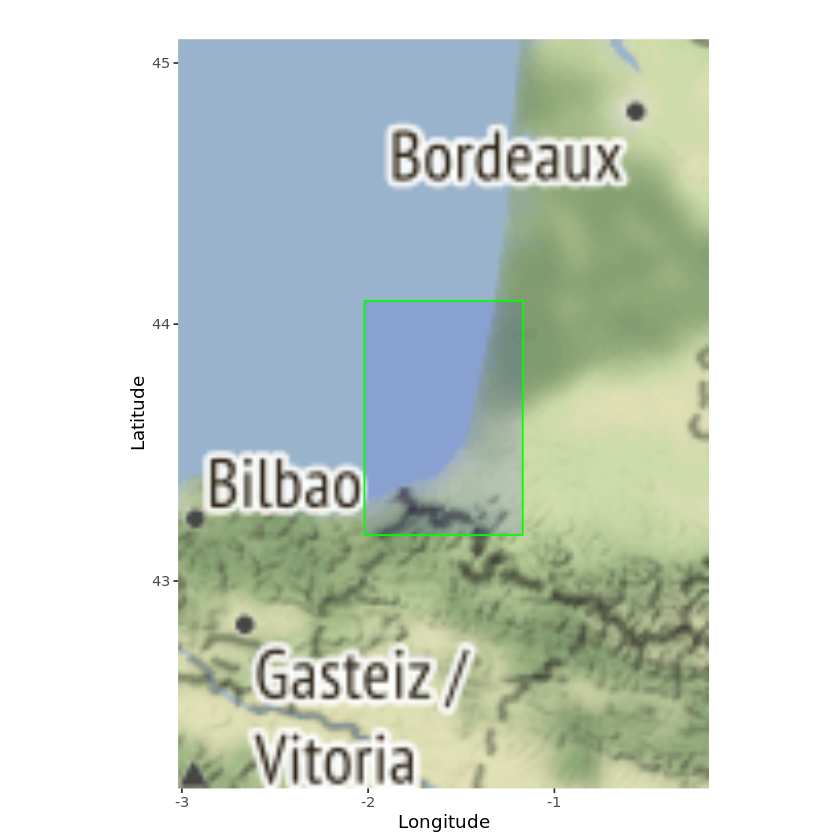

In [4]:
# Displaying the defined area on map
sr=sp::SpatialPolygons(list(sp::Polygons(list(sp::Polygon(cbind(c(xmin, xmin, xmax, xmax),c(ymax, ymin, ymin, ymax)))),"1")))
mpa=sp::SpatialPolygonsDataFrame(sr, data.frame(cbind(1:1), row.names=c("1")))
sp::proj4string(mpa)<-CRS("+proj=longlat +datum=WGS84")


zoom_value<-6 #zoom definition
base<-get_map(location=c(xmin-1,ymin-1,xmax+1,ymax+1), zoom=zoom_value, maptype="terrain-background", source = "stamen")
terrain <- ggmap(base)

map <- terrain + geom_polygon(data=mpa,aes(x=long,y=lat,group=group,fill="mpa"),colour="green",fill="blue",alpha=.1) +
ggtitle("")+xlab("Longitude")+ylab("Latitude")
plot(map)


# EMODnet physics WFS

The WFS of the EMODnet Physics portal offers the possibility to identify the existing in-situ measurements for the region of interest (bbox).


[1] "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?service=WFS&VERSION=1.1.0&request=GetFeature&typeName=EP_PLATFORMS_SLEV&OUTPUTFORMAT=csv&bbox=43.18,-2.02,44.09,-1.17"
[1] "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?service=WFS&VERSION=1.1.0&request=GetFeature&typeName=EP_PLATFORMS_WIND&OUTPUTFORMAT=csv&bbox=43.18,-2.02,44.09,-1.17"
[1] "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?service=WFS&VERSION=1.1.0&request=GetFeature&typeName=EP_PLATFORMS_WAVE&OUTPUTFORMAT=csv&bbox=43.18,-2.02,44.09,-1.17"
[1] "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?service=WFS&VERSION=1.1.0&request=GetFeature&typeName=EP_PLATFORMS_TEMP&OUTPUTFORMAT=csv&bbox=43.18,-2.02,44.09,-1.17"
[1] "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?service=WFS&VERSION=1.1.0&request=GetFeature&typeName=EP_PLATFORMS_HCXX&OUTPUTFORMAT=csv&bbox=43.18,-2.02,44.09,-1.17"
[1] "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?service=WFS&VERSION=1.1.0&r

Regions defined for each Polygons



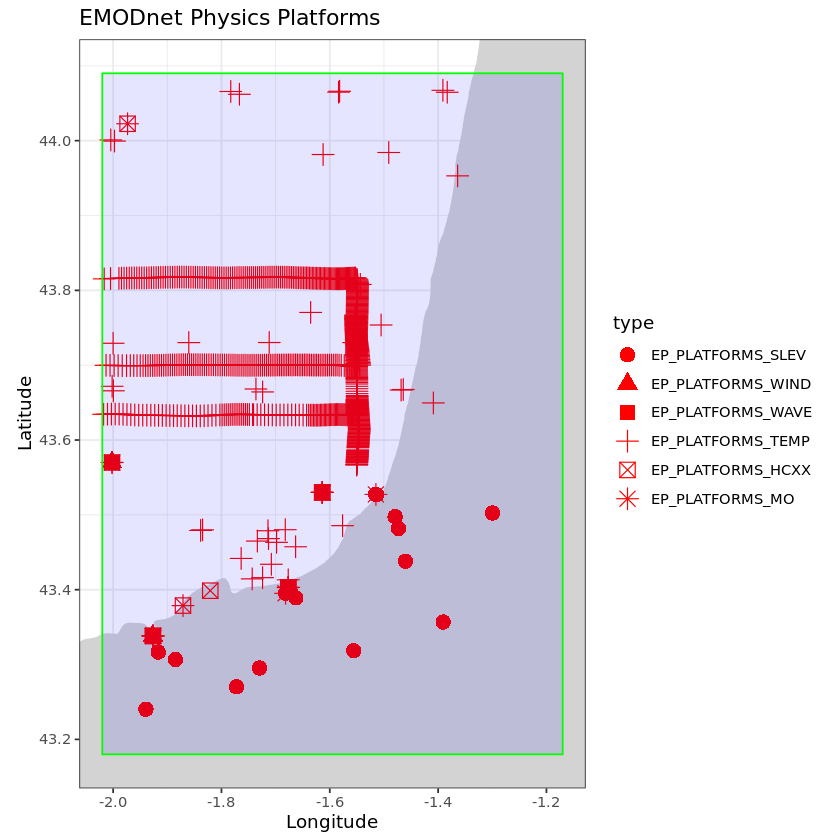

In [5]:
# function to download point data as csv from the EMODnet physics WFS
getEMODnetPhysicsplatform<-function(name="EP_PLATFORMS_SLEV",xmin,xmax,ymin,ymax){
  name<-as.character(name)
  bbox<-paste(xmin,xmax,ymin,ymax,sep=",")
  con<-paste0(wfs_url,"service=WFS&VERSION=1.1.0&request=GetFeature&typeName=",name,"&OUTPUTFORMAT=csv&bbox=",bbox)
  utils::download.file(con,"dat.csv", quiet = TRUE, mode = "wb")
  pipo<-utils::read.csv("dat.csv")
  if(ncol(pipo)<=1){
    return(data.frame())
  }
  else{
    xy<-strsplit(gsub("\\)","",gsub("POINT \\(","",pipo$position)),split=" ")
    fun1<-function(a){as.numeric(a[1])}
    fun2<-function(a){as.numeric(a[2])}
    pipo$y<-sapply(xy,fun1)
    pipo$x<-sapply(xy,fun2)
    print(con)
    return(pipo)
  }
  
}

# define a function to combine different data layers in a dataframe
getEMODnetPhysicsplatformall<-function (xmin, xmax, ymin, ymax){
  physics <- data.frame()
  
  rez0 <- getEMODnetPhysicsplatform("EP_PLATFORMS_SLEV", ymin, xmin, ymax, xmax)
  if (nrow(rez0) > 0){
    physics1 <- data.frame(type = "EP_PLATFORMS_SLEV", status = rez0$ProjectsDescr,
                           purpose = rez0$ParametersGroupDescr, info = rez0$DataOwner, name = rez0$PlatformID, PltLink = rez0$PlatformInfoLink,
                           country = rez0$Country, x = rez0$x, y = rez0$y)
    physics <- rbind(physics, physics1)
    rm(rez0)
  }
  
  rez0 <- getEMODnetPhysicsplatform("EP_PLATFORMS_WIND", ymin, xmin, ymax, xmax)
  if (nrow(rez0) > 0){
    physics1 <- data.frame(type = "EP_PLATFORMS_WIND", status = rez0$ProjectsDescr,
                           purpose = rez0$ParametersGroupDescr, info = rez0$DataOwner, name = rez0$PlatformID, PltLink = rez0$PlatformInfoLink,
                           country = rez0$Country, x = rez0$x, y = rez0$y)
    physics <- rbind(physics, physics1)
    rm(rez0)
  }
  
  rez0 <- getEMODnetPhysicsplatform("EP_PLATFORMS_WAVE", ymin, xmin, ymax, xmax)
  if (nrow(rez0) > 0){
    physics1 <- data.frame(type = "EP_PLATFORMS_WAVE", status = rez0$ProjectsDescr,
                           purpose = rez0$ParametersGroupDescr, info = rez0$DataOwner, name = rez0$PlatformID, PltLink = rez0$PlatformInfoLink,
                           country = rez0$Country, x = rez0$x, y = rez0$y)
    physics <- rbind(physics, physics1)
    rm(rez0)
  }
  
  rez0 <- getEMODnetPhysicsplatform("EP_PLATFORMS_TEMP", ymin, xmin, ymax, xmax)
  if (nrow(rez0) > 0){
    physics1 <- data.frame(type = "EP_PLATFORMS_TEMP", status = rez0$ProjectsDescr,
                           purpose = rez0$ParametersGroupDescr, info = rez0$DataOwner, name = rez0$PlatformID, PltLink = rez0$PlatformInfoLink,
                           country = rez0$Country, x = rez0$x, y = rez0$y)
    physics <- rbind(physics, physics1)
    rm(rez0)
  }
  
  rez0 <- getEMODnetPhysicsplatform("EP_PLATFORMS_HCXX", ymin, xmin, ymax, xmax)
  if (nrow(rez0) > 0){
    physics1 <- data.frame(type = "EP_PLATFORMS_HCXX", status = rez0$ProjectsDescr,
                           purpose = rez0$ParametersGroupDescr, info = rez0$DataOwner, name = rez0$PlatformID, PltLink = rez0$PlatformInfoLink,
                           country = rez0$Country, x = rez0$x, y = rez0$y)
    physics <- rbind(physics, physics1)
    rm(rez0)
  }
  
  rez0 <- getEMODnetPhysicsplatform("EP_PLATFORMS_MO", ymin, xmin, ymax, xmax)
  if (nrow(rez0) > 0){
    physics1 <- data.frame(type = "EP_PLATFORMS_MO", status = rez0$ProjectsDescr,
                           purpose = rez0$ParametersGroupDescr, info = rez0$DataOwner, name = rez0$PlatformID, PltLink = rez0$PlatformInfoLink,
                           country = rez0$Country, x = rez0$x, y = rez0$y)
    physics <- rbind(physics, physics1)
    rm(rez0)
  }
  
  
  rez0 <- getEMODnetPhysicsplatform("EP_PLATFORMS_FB", ymin, xmin, ymax, xmax)
  if (nrow(rez0) > 0){
    physics1 <- data.frame(type = "EP_PLATFORMS_FB", status = rez0$ProjectsDescr,
                           purpose = rez0$ParametersGroupDescr, info = rez0$DataOwner, name = rez0$PlatformID, PltLink = rez0$PlatformInfoLink,
                           country = rez0$Country, x = rez0$x, y = rez0$y)
    physics <- rbind(physics, physics1)
    rm(rez0)
  }
  
  rez0 <- getEMODnetPhysicsplatform("EP_PLATFORMS_GL", ymin, xmin, ymax, xmax)
  if (nrow(rez0) > 0){
    physics1 <- data.frame(type = "EP_PLATFORMS_GL", status = rez0$ProjectsDescr,
                           purpose = rez0$ParametersGroupDescr, info = rez0$DataOwner, name = rez0$PlatformID, PltLink = rez0$PlatformInfoLink,
                           country = rez0$Country, x = rez0$x, y = rez0$y)
    physics <- rbind(physics, physics1)
    rm(rez0)
  }
  
  return(physics)
}

# get the data for the defined area
physics<-getEMODnetPhysicsplatformall(xmin,xmax,ymin,ymax)


# PLOT MAP WITH Platforms
map<-ggplot() +
  theme_bw() +
  borders("worldHires",xlim=c(xmin,xmax),ylim=c(ymin,ymax),fill="light grey",colour="light grey")+ 
  geom_point(data= physics,aes(x=x,y=y,shape=type,group=type),colour="red", alpha=1, size=4) +
  geom_polygon(data=mpa,aes(x=long,y=lat,group=group,fill="mpa"),colour="green",fill="blue",alpha=.1) +
  coord_quickmap(xlim=range(xmin,xmax),ylim=range(ymin,ymax)) +
  ggtitle("EMODnet Physics Platforms")+xlab("Longitude")+ylab("Latitude")
plot(map)




# Get layer names from WFS getcapabilities

In [34]:
Getcapabilities<-function(){
  con<-paste0(wfs_url,"service=WFS&version=1.1.0&request=Getcapabilities")
  pipo <- xmlParse(file = con)
  return(pipo)
}
WFS_GetCapa <- Getcapabilities()

rootnode <- xmlRoot(WFS_GetCapa)

rootsize <- xmlSize(rootnode)
numberOfLayers <- xmlSize(rootnode[[4]])

EMODnetPhysics<-data.frame()

for (i in 1:xmlSize(rootnode[[4]]))
{
Layer_i <- c(rootnode[[4]][[i]][[1]],rootnode[[4]][[i]][[2]])
EMODnetPhysics <- append(EMODnetPhysics, Layer_i)
}

EMODnetPhysics


[1] "FID"                  "fid"                  "position"            
 [4] "PlatformID"           "MapPlatformID"        "ProjectsDescr"       
 [7] "PlatformCode"         "WMOCode"              "SeaRegionCode"       
[10] "SeaRegionDescr"       "ParametersGroupCode"  "ParametersGroupDescr"
[13] "ParametersCodeDescr"  "DataTypeDescr"        "LastDataMeasured"    
[16] "Country"              "DataOwner"            "DataProvider"        
[19] "LogoURL"              "PlatformTypeCode"     "PlatformInfoLink"    
[22] "ColorFeatures"        "ProjectsCode"

# Get colnames from WFS

In [6]:
DescribeFeatureType<-function(layer){
layer<-as.character(layer)
con<-paste0(wfs_url,"service=WFS&version=1.1.0&request=GetFeature&featureID=",geometry_name,"&typeName=",layer,"&OUTPUTFORMAT=csv")
pipo<-utils::read.csv(url(con), header= TRUE, encoding = 'UTF-8')
return(pipo)
}
WFS_Colnames <- DescribeFeatureType(layer)
colnames( WFS_Colnames )

rez_nblist<- c(1:dim(WFS_Colnames)[2])

[1] "FID"                  "fid"                  "position"            
 [4] "PlatformID"           "MapPlatformID"        "ProjectsDescr"       
 [7] "PlatformCode"         "WMOCode"              "SeaRegionCode"       
[10] "SeaRegionDescr"       "ParametersGroupCode"  "ParametersGroupDescr"
[13] "ParametersCodeDescr"  "DataTypeDescr"        "LastDataMeasured"    
[16] "Country"              "DataOwner"            "DataProvider"        
[19] "LogoURL"              "PlatformTypeCode"     "PlatformInfoLink"    
[22] "ColorFeatures"        "ProjectsCode"

# GET DATA as CSV

In [7]:
getWFSpoly<-function(layer, xmin, xmax, ymin, ymax){
layer<-as.character(layer)
#!!!! there is an error with the bbox xmin, xmax ... don't appear in the right order ???
#bbox<-paste(xmin,ymin,xmax,ymax,sep=",")
bbox<-paste(xmin,xmax,ymin,ymax,sep=",")
con<-paste0(wfs_url,"service=WFS&version=1.1.0&request=GetFeature&typeName=",layer,"&bbox=",bbox,",EPSG:4326&outputFormat=csv")
pipo<-utils::read.csv(url(con), header= TRUE, encoding = 'UTF-8')
# if no data return empty dataframe
print(con)
if(ncol(pipo)<=1){
return(data.frame())
} else {
# convert coordinates to numeric type
xy<-strsplit(gsub("\\)","",gsub("POINT \\(","",pipo[[geometry_name]])),split=" ")
fun1<-function(a){as.numeric(a[1])}
fun2<-function(a){as.numeric(a[2])}
pipo$y<-sapply(xy,fun1)
pipo$x<-sapply(xy,fun2)
return(pipo)
}
}

getWFSpolyall<-function (layer, xmin, xmax, ymin, ymax, rez_nblist){
wfs_data <- data.frame()
layer<-as.character(layer)
rez0 <- getWFSpoly(layer, xmin, xmax, ymin, ymax)
if (nrow(rez0) > 0) {
col_rez0 = c()
for (i in 1:length(rez_nblist))
{col_rez0 <- append(col_rez0, rez0[rez_nblist[i]])}

wfs_data1 <- data.frame(col_rez0)
wfs_data <- rbind(wfs_data,wfs_data1)
rm(rez0)
}
return(wfs_data)
}


wfs_data<-getWFSpolyall(layer, xmin, xmax, ymin, ymax, rez_nblist)


#plot data

if(nrow(wfs_data) > 0) {

wfs_data

} else {

print("No data available for the defined geographical extent")

}



[1] "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?service=WFS&version=1.1.0&request=GetFeature&typeName=EP_PLATFORMS_SLEV&bbox=-2.02,-1.17,43.18,44.09,EPSG:4326&outputFormat=csv"


FID,fid,position,PlatformID,MapPlatformID,ProjectsDescr,PlatformCode,WMOCode,SeaRegionCode,SeaRegionDescr,⋯,DataTypeDescr,LastDataMeasured,Country,DataOwner,DataProvider,LogoURL,PlatformTypeCode,PlatformInfoLink,ColorFeatures,ProjectsCode
<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
EP_PLATFORMS_SLEV.fid--1a753987_17796917fdf_-162,28523,POINT (42.1189 15.5016),639609,670616,"CMEMS INSTAC,Fixed Moorings",RMN-IsoleTremiti,,Mediterranean Sea,Adriatic Sea,⋯,"NRT,NRT M,REP",2020/09/27 23:53:00,Italy,ISPRA - Istituto Superiore per la Protezione e la Ricerca Ambientale - Italy,ISPRA - Istituto Superiore per la Protezione e la Ricerca Ambientale,http://www.emodnet-physics.eu/Map/includes/images/dataProviders/loghi/ISPRA.png,TG,http://www.emodnet-physics.eu/map/spi.aspx?id=639609,#FF00FF,"INSTAC,FIXEDMOORINGS"
EP_PLATFORMS_SLEV.fid--1a753987_17796917fdf_-161,28533,POINT (41.1798 29.6039),639610,670621,"CMEMS INSTAC,Fixed Moorings",Sile,,Black Sea,Black Sea,⋯,"NRT,NRT M",2021/02/11 09:21:00,Turkey,"GCM - The Ministry of National Defense, General Command of Mapping - Turkey",General Command of Mapping (Turkey),http://www.emodnet-physics.eu/Map/includes/images/dataProviders/loghi/none.png,MO,http://www.emodnet-physics.eu/map/spi.aspx?id=639610,#DC323B,"INSTAC,FIXEDMOORINGS"
EP_PLATFORMS_SLEV.fid--1a753987_17796917fdf_-160,28543,POINT (41.0019 39.7445),639611,670622,"CMEMS INSTAC,Fixed Moorings",Trabzon,,Black Sea,Black Sea,⋯,"NRT,NRT M,REP",2021/02/11 09:20:30,Turkey,"GCM - The Ministry of National Defense, General Command of Mapping - Turkey",General Command of Mapping (Turkey),http://www.emodnet-physics.eu/Map/includes/images/dataProviders/loghi/none.png,MO,http://www.emodnet-physics.eu/map/spi.aspx?id=639611,#DC323B,"INSTAC,FIXEDMOORINGS"
EP_PLATFORMS_SLEV.fid--1a753987_17796917fdf_-15f,63293,POINT (43.3189 4.8662),7274,7274,"JericoNEXT,CMEMS INSTAC,Fixed Moorings",61284,61284,Mediterranean Sea,Mediterranean Sea - Western Basin,⋯,"NRT,NRT M,REP",2019/10/15 16:33:12,France,IFREMER - Institut Français de Recherche pour l'Exploitation de la Mer - France,IFREMER Institut Francais de Recherche pour l'Exploitation de la Mer,http://www.emodnet-physics.eu/Map/includes/images/dataProviders/loghi/ifremer.png,MO,http://www.emodnet-physics.eu/map/spi.aspx?id=7274,#DC323B,"JRC,INSTAC,FIXEDMOORINGS"
EP_PLATFORMS_SLEV.fid--1a753987_17796917fdf_-15e,70788,POINT (39.893 4.27056),8739,8739,CMEMS INSTAC,MahonTG,,Mediterranean Sea,Mediterranean Sea - Western Basin,⋯,"NRT,NRT M,REP",2021/02/11 14:04:00,Spain,PdE - Puertos del Estado - Spain,Puertos del Estado (Spain),http://www.emodnet-physics.eu/Map/includes/images/dataProviders/loghi/puertodelestado.png,TG,http://www.emodnet-physics.eu/map/spi.aspx?id=8739,#FF00FF,INSTAC
EP_PLATFORMS_SLEV.fid--1a753987_17796917fdf_-15d,77760,POINT (42.958 27.899),8888,8888,"JericoNEXT,CMEMS INSTAC,Fixed Moorings",Shkorpilovtsi,,Black Sea,Black Sea,⋯,"NRT,NRT M,REP",2018/12/19 09:20:00,Bulgaria,IOBAS - Institude of Oceanology - Bulgarian Academy of Science - Bulgaria,Institute of Oceanology Bulgarian Academy of Sciences (IO-BAS),http://www.emodnet-physics.eu/Map/includes/images/dataProviders/loghi/IOBAS.png,MO,http://www.emodnet-physics.eu/map/spi.aspx?id=8888,#DC323B,"JRC,INSTAC,FIXEDMOORINGS"
EP_PLATFORMS_SLEV.fid--1a753987_17796917fdf_-15c,87434,POINT (40.026 15.266),10752,248923,"SeaDataNet,Fixed Moorings",RMN-PALINURO PALI0,,Mediterranean Sea,Tyrrhenian Sea,⋯,VAL,2004/12/31 00:00:00,Italy,APAT - Agency for Environmental Protection and Technical Services - Italy,,http://www.emodnet-physics.eu/Map/includes/images/dataProviders/loghi/none.png,MO,http://www.emodnet-physics.eu/map/spi.aspx?id=10752,#DC323B,"SDN,FIXEDMOORINGS"
EP_PLATFORMS_SLEV.fid--1a753987_17796917fdf_-15b,87444,POINT (40.846 8.406),10753,12234,"SeaDataNet,Fixed Moorings",RMN-PORTOTORRES PTOR0,,Mediterranean Sea,Mediterranean Sea - Western Basin,⋯,VAL,2004/12/31 00:00:00,Italy,A

# Get data as GEOJSON

[1] "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?service=WFS&srsName=EPSG:4326&version=1.1.0&request=GetFeature&typeName=EP_PLATFORMS_SLEV&OUTPUTFORMAT=application/json&bbox=-2.02,43.18,-1.17,44.09,EPSG:4326"
OGR data source with driver: GeoJSON 
Source: "http://geoserver.emodnet-physics.eu/geoserver/emodnet/wfs?service=WFS&srsName=EPSG:4326&version=1.1.0&request=GetFeature&typeName=EP_PLATFORMS_SLEV&OUTPUTFORMAT=application/json&bbox=-2.02,43.18,-1.17,44.09,EPSG:4326", layer: "OGRGeoJSON"
with 48 features
It has 22 fields


Regions defined for each Polygons



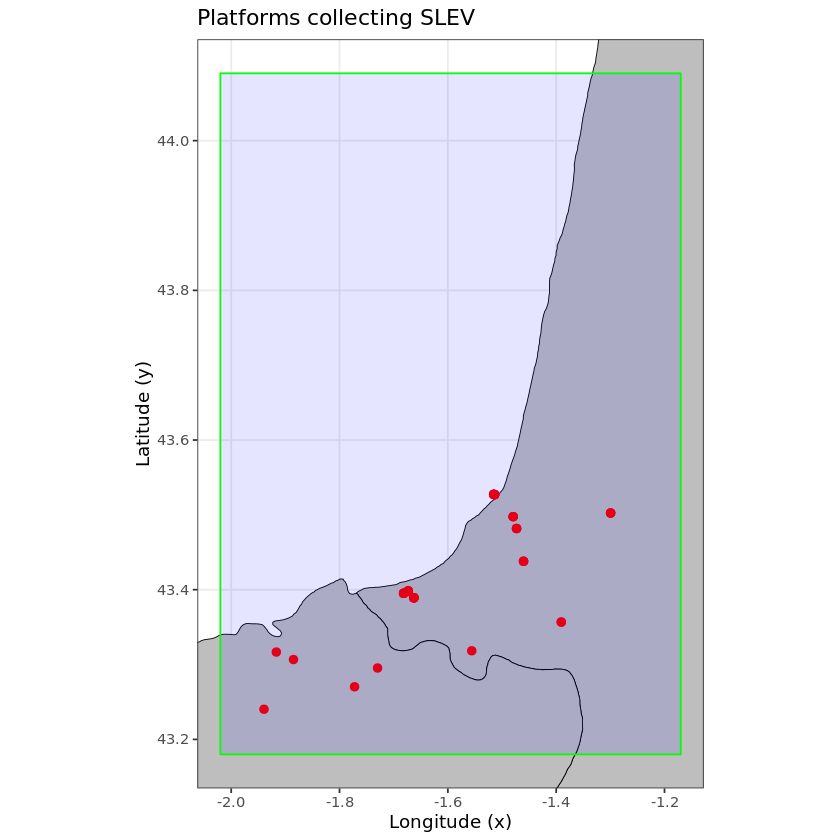

In [8]:
getGeojson<-function(layer, xmin, xmax, ymin, ymax){
layer<-as.character(layer)
bbox<-paste(xmin,ymin,xmax,ymax,sep=",")
con<-paste0(wfs_url,"service=WFS&srsName=",epsg_code,"&version=1.1.0&request=GetFeature&typeName=",
layer,"&OUTPUTFORMAT=application/json&bbox=",bbox,",EPSG:4326")
print(con)
ogrInfo(dsn=con,layer = 'OGRGeoJSON')
layer<-readOGR(dsn=con,layer = 'OGRGeoJSON', encoding = "UTF-8", use_iconv = TRUE)
return(layer)
}

#get data
WFS_json<-getGeojson(layer, xmin, xmax, ymin, ymax)
WFS_json<-spTransform(WFS_json,CRS("+proj=longlat +datum=WGS84"))
WFS_json <- intersect(WFS_json, mpa)


#print map
if(nrow(wfs_data) > 0) {

WFS_json_df <- as.data.frame(WFS_json)
colnames(WFS_json_df)[colnames(WFS_json_df) %in% c("coords.x1", "coords.x2")] <- c("x_longitude", "y_latitude")

map <- ggplot() +
borders("worldHires", fill = "gray", colour = "black", xlim = range(xmin,xmax), ylim = range(ymin,ymax), size = .25) +
  theme_bw() +
  theme(panel.grid.minor.y= element_blank(), panel.grid.minor.x = element_blank()) +
  geom_point(data=WFS_json_df,aes(x = x_longitude, y = y_latitude), color="red" ,alpha=1,size=2) +
  geom_polygon(data=mpa,aes(x=long,y=lat,group=group,fill="mpa"),colour="green",fill="blue",alpha=.1) +
  coord_quickmap(xlim=range(xmin,xmax),ylim=range(ymin,ymax)) +
  ggtitle(layer_title)+xlab("Longitude (x)")+ylab("Latitude (y)")

map

} else {

print("No data available for the defined geographical extent")
  
}


# print map with ids



Regions defined for each Polygons

Warning message:
“Ignoring unknown parameters: check_overlap”
Warning message:
“Use of `WFS_json_df[[map_label]]` is discouraged. Use `.data[[map_label]]` instead.”
Warning message:
“ggrepel: 29 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


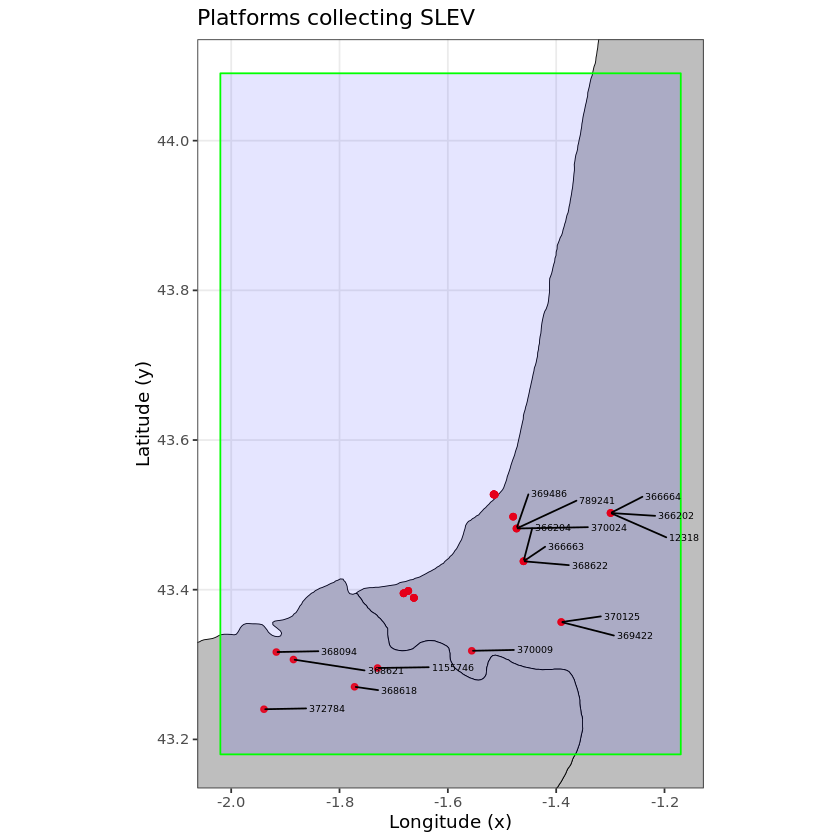

In [9]:
if(nrow(wfs_data) > 0) {

map <- ggplot() +
borders("worldHires", fill = "gray", colour = "black", xlim = range(xmin,xmax), ylim = range(ymin,ymax), size = .25) +
  theme_bw() +
  theme(panel.grid.minor.y= element_blank(), panel.grid.minor.x = element_blank()) +
  geom_point(data=WFS_json_df,aes(x = x_longitude, y = y_latitude),colour="red",fill="blue",alpha=.9) +
  geom_polygon(data=mpa,aes(x=long,y=lat,group=group,fill="mpa"),colour="green",fill="blue",alpha=.1) +
  geom_text_repel(data=WFS_json_df, aes(label = WFS_json_df[[map_label]], x = x_longitude, y = y_latitude), size=2, hjust= 0, vjust=2, check_overlap = TRUE) +
  coord_quickmap(xlim=range(xmin,xmax),ylim=range(ymin,ymax)) +
  ggtitle(layer_title)+xlab("Longitude (x)")+ylab("Latitude (y)")

map


} else {

print("No data available for the defined geographical extent")

}


## Access measurements (7days) from ERDDAP

In [ ]:
if(nrow(wfs_data) > 0) {

XSLEVLIST <- list() 
PlatformIDLIST <- c()
map_PlatformID <- 'PlatformID'
Parameter <- 'SLEV'
Units <- 'meter'


for (data in 1:nrow(wfs_data)){
PlatformID <- as.integer(wfs_data[[map_label]][data])
EndDate <- format(Sys.time(), '%d/%m/%Y')
StartDate <- format(as.Date(Sys.time())-7, '%d/%m/%Y')
erddap_url <- paste0("https://erddap.emodnet-physics.eu/erddap/tabledap/EP_ERD_INT_SLEV_AL_TS_NRT.csvp?EP_PLATFORM_ID,time,depth,",Parameter,"&EP_PLATFORM_ID=%22",PlatformID,"%22&time%3E=now-7days")

print(PlatformID)

tryCatch({CSLEV<- read.csv(erddap_url, header=T)


if(length(CSLEV) > 0) {

colnames(CSLEV) <- c('ID','DATE','DEPTH','SLEV')
CSLEV$DATE <- as.POSIXct(CSLEV$DATE, "UTC", "%Y-%m-%dT%H:%M:%S")
XSLEV<- subset(CSLEV, select=c("DATE","SLEV"))


#Select the first depth in the list
#XSLEV<-XSLEV[XSLEV$DEPTH == min(XSLEV$DEPTH, na.rm=T), ]

XSLEVLIST[[data]] <- subset(XSLEV, select=c("DATE","SLEV"))
PlatformIDLIST <- append(PlatformIDLIST, PlatformID)

map <- ggplot(XSLEV, aes(x = DATE, y = SLEV))+ geom_point()+geom_smooth(aes(color=DATE,fill=DATE))+
ggtitle(paste("PlatformID: ",PlatformID," - ",min(XSLEV$DEPTH, na.rm=T)))+xlab("7 days")+ylab(paste0(Parameter," (",Units,")"))
plot(map)


} else {
print(paste("PlatformID:",as.integer(PlatformID),"- No accessible data"))
}
}, error=function(e){cat("ERROR: No accessible data\n",conditionMessage(e), "\n")})
}
}


